# TITANIC SURVIVAL PREDICTION

**Step 1: Data Preprocessing**

In [15]:
import pandas as pd
import numpy as np

# Load the Titanic dataset
df = pd.read_csv("C:/Users/yuvis/Downloads/Titanic-Dataset.csv")

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna('S')
# Convert categorical variables into numerical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop unnecessary columns
df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

# Create a new feature: FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(df[['Age', 'Fare', 'FamilySize']])

**Step 2: Feature Selection**

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the top 5 features using SelectKBest
X = df.drop('Survived', axis=1)
y = df['Survived']
selector = SelectKBest(f_classif, k=5)
X_selected = selector.fit_transform(X, y)

# Get the feature names
feature_names = X.columns[selector.get_support(indices=True)]

print("Selected features:", feature_names)

Selected features: Index(['Pclass', 'Sex', 'Parch', 'Fare', 'Embarked'], dtype='object')


**Step 3: Machine Learning Models**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train and evaluate multiple machine learning models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100)
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Model:", model.__class__.__name__)
   

Model: LogisticRegression
Model: DecisionTreeClassifier
Model: RandomForestClassifier


In [18]:
 print("Accuracy:", accuracy_score(y_test, y_pred))
    

Accuracy: 0.8100558659217877


In [19]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
    

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [20]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[89 16]
 [18 56]]


**Step 4: Visualization**

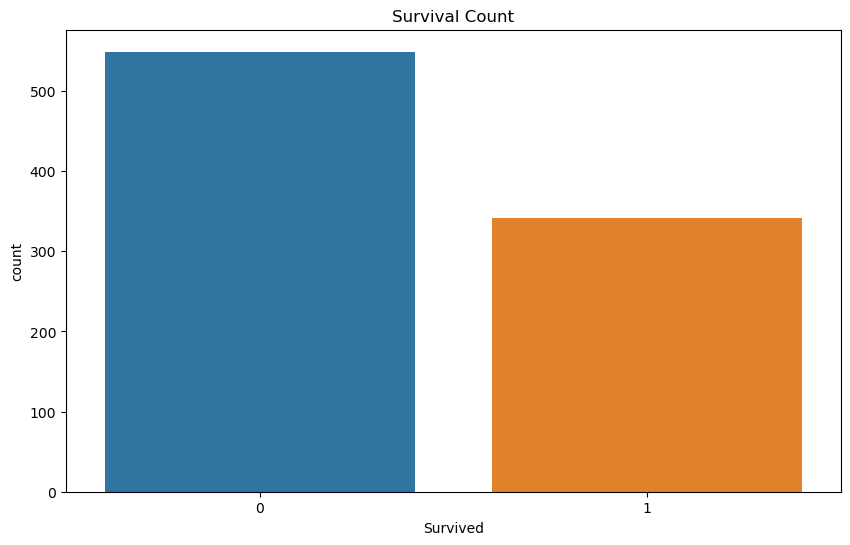

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

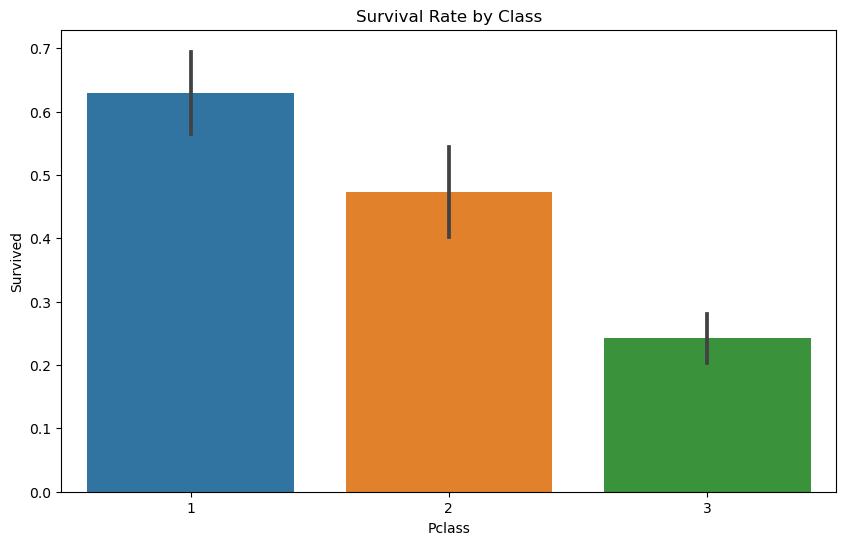

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Class")
plt.show()

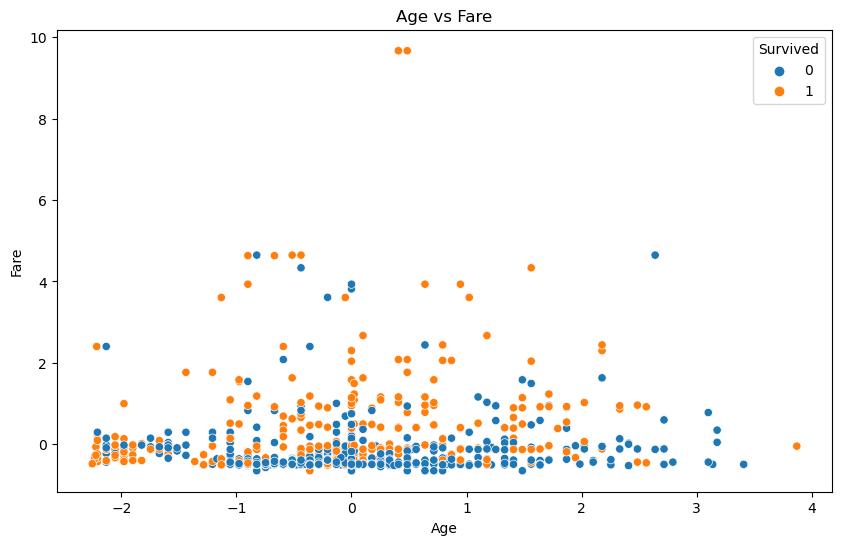

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Age vs Fare")
plt.show()

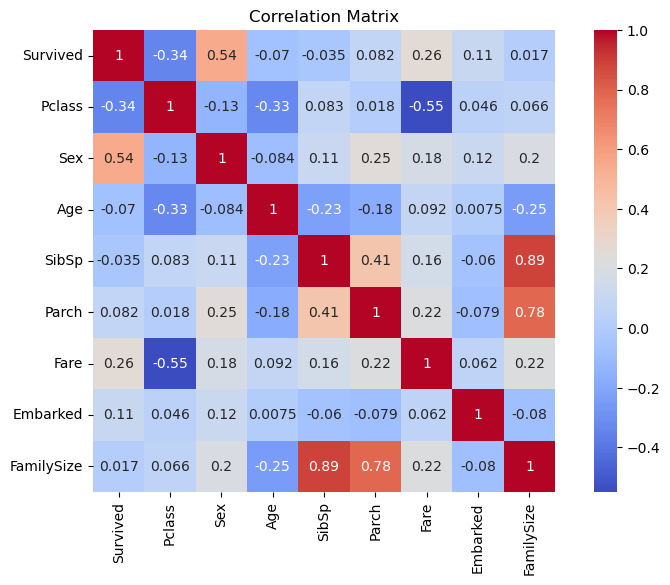

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

**Step 5: Predict Survival for a Passenger using Passenger's Id**

In [30]:
# Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Load the dataset (assuming you've already loaded it and preprocessed it)
titanic_df = pd.read_csv("C:/Users/yuvis/Downloads/Titanic-Dataset.csv")

# Perform one-hot encoding for categorical variables
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'])

# Define the features (X) and target variable (y)
X = titanic_df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])  # Exclude unwanted columns
y = titanic_df['Survived']

# Impute missing values
imputer = SimpleImputer(strategy='median')  # You can choose a different strategy if needed
X = imputer.fit_transform(X)

# Train a Random Forest Classifier (assuming you've already trained the model)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Input PassengerId
print("Enter PassengerId")
input_passenger_id =int(input())  # Replace with the PassengerId you want to predict

# Find the corresponding row in the dataset
passenger_data = titanic_df[titanic_df['PassengerId'] == input_passenger_id]

# Check if the PassengerId exists in the dataset
if len(passenger_data) == 0:
    print(f"PassengerId {input_passenger_id} not found in the dataset or No such passenger")
else:
    # Extract features for prediction and impute missing values
    passenger_features = passenger_data.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
    passenger_features = imputer.transform(passenger_features)

    # Make a prediction for the passenger
    prediction = clf.predict(passenger_features)
    
    # Print the prediction
    if prediction[0] == 1:
        print(f"PassengerId {input_passenger_id} survived.")
    else:
        print(f"PassengerId {input_passenger_id} did not survive.")



Enter PassengerId
569
PassengerId 569 did not survive.
